# Assessment 2 - Part 1: Machine Learning
<br>

## Task: train regression models that predict two indicators of energy efficiency based on 8 numerical inputs. 
<br>

### Packages needed:

- pandas
- sklearn
- numpy
- matplotlib

### 1.1 - Data Preparation

#### Importing libraries

In [54]:
## Imports
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Used for normalising the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## Used for regression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Used for assessment of regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Used for cross validation
from sklearn.model_selection import cross_val_score

#### Loading the dataset

In [55]:
energy_data = pd.read_excel("data.xlsx")

energy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Extracting and splitting data

In [56]:
#inputs
inputs = energy_data.values[:,:8].astype(float)

# Projecting data into 2 dimensions with PCA.
pca = PCA(n_components = 2)
compressed_inputs = pca.fit_transform(inputs)

#normalise the inputs
scaler = MinMaxScaler()
scaled_inputs = scaler.fit_transform(inputs)

#targets
targets =  energy_data.values[:,8:].astype(float)

# Print the range of the variables to show the normalisation effect.
print(inputs.ptp(axis=0))
print(scaled_inputs.ptp(axis=0))

[  0.36 294.   171.5  110.25   3.5    3.     0.4    5.  ]
[1. 1. 1. 1. 1. 1. 1. 1.]


#### Setting up train and test data

In [57]:
#set up data
x_train, x_test, y_train, y_test = train_test_split(compressed_inputs, targets, test_size=0.3, random_state=0)

### Task 1.2 - Regression

#### Regression using the "sklearn.neural_network.MLPRegressor"

In [58]:
MLP = MLPRegressor(max_iter=15000)
MLP.fit(x_train, y_train)

y_pred = MLP.predict(x_test)
x_pred = MLP.predict(y_test)

MLP_test = abs(cross_val_score(MLP, x_test, y_test, cv=10, scoring='neg_mean_squared_error'))
print(MLP_test)

MLP_train = abs(cross_val_score(MLP, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(MLP_train)

[ 87.44252043  56.52193396  65.67001338  41.08274175  69.30855934
  55.28929606  38.54211743 103.79164662  38.63673646  48.31863683]
[11.14275097 11.86852624 10.19127385  7.64321066 11.17634606  6.86398932
  8.17147293  9.43789873  9.10554383 10.09671755]


#### Regression using the "sklearn.ensemble.RandomForestRegressor"

In [59]:
Forest = RandomForestRegressor()

Forest.fit(x_train, y_train)

y_pred = MLP.predict(x_test)
x_pred = MLP.predict(y_test)

Forest_test = abs(cross_val_score(Forest, x_test, y_test, cv=10, scoring='neg_mean_squared_error'))
print(Forest_test)
Forest_train = abs(cross_val_score(Forest, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(Forest_train)


[10.49316677  8.10432055 10.29376119 13.54498418 12.94454293  7.54812508
  3.43476741 12.51183972  8.14848614  4.61493769]
[10.06103886  9.70704032  9.56477055  6.78390157 10.26499803  5.76882193
  6.53829937  9.17969117  7.80792055  8.67882998]


#### Regression using the "sklearn.svm.SVR"

In [60]:
SVR_Regressor = SVR()

SVR_Regressor.fit(x_train, y_train[:, 0])
y_pred_1 = SVR_Regressor.predict(x_test)
x_pred_1 = SVR_Regressor.predict(y_test)

SVR_Regressor.fit(x_train, y_train[:, 1])
y_pred_2 = SVR_Regressor.predict(x_test)
x_pred_2 = SVR_Regressor.predict(y_test)

SVR_test_1 = abs(cross_val_score(SVR_Regressor, x_test, y_test[:, 0], cv=10, scoring='neg_mean_squared_error'))
SVR_test_2 = abs(cross_val_score(SVR_Regressor, x_test, y_test[:, 1], cv=10, scoring='neg_mean_squared_error'))
print(SVR_test_1)
print(SVR_test_2)

SVR_train_1 = abs(cross_val_score(SVR_Regressor, x_train, y_train[:, 0], cv=10, scoring='neg_mean_squared_error'))
SVR_train_2 = abs(cross_val_score(SVR_Regressor, x_train, y_train[:, 1], cv=10, scoring='neg_mean_squared_error'))
print(SVR_train_1)
print(SVR_train_2)

[34.27681183 18.63080723 20.58084329 18.54243897 22.35872073 13.84474113
  8.2095067  19.20820559 14.25903044  9.30259754]
[21.39762715 12.98323354 15.09472659 19.08617581 12.36334025 12.51937323
  8.45425043 18.8904243   9.97074994 12.0389426 ]
[19.59552996 14.95673675 19.10485575 12.97196048 16.64345827  8.26065706
 14.54013012 15.26432334 12.14862398 10.58348838]
[14.04210096  8.63811031 15.43506383 13.24847525 11.18989525  8.95824122
 18.10521167 14.42243957 10.47895142 11.88875849]


### Task 1.3 - Assessment of  Regression

#### Boxplot

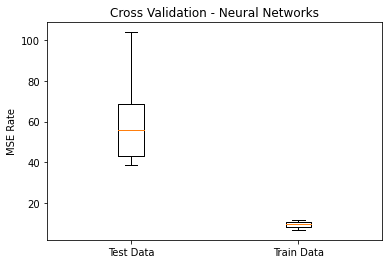

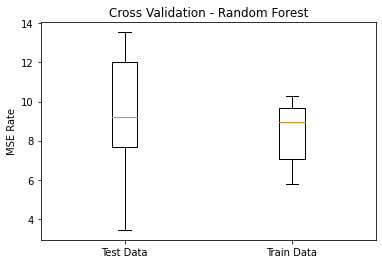

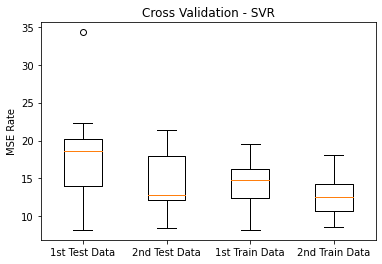

In [61]:
Forest_DATA = [Forest_test, Forest_train]
MLP_DATA = [MLP_test, MLP_train]
SVR_DATA = [SVR_test_1, SVR_test_2, SVR_train_1, SVR_train_2]

## Neural Network Model

plt.figure()
plt.title("Cross Validation - Neural Networks")

# Creating plot
plt.boxplot(MLP_DATA)

plt.xticks([1, 2], ['Test Data', 'Train Data'])
plt.ylabel('MSE Rate')

# show plot
plt.show()

## Forest Model

plt.figure()
plt.title("Cross Validation - Random Forest")

# Creating plot
plt.boxplot(Forest_DATA)

plt.xticks([1, 2], ['Test Data', 'Train Data'])
plt.ylabel('MSE Rate')

# show plot
plt.show()

## SVR Model

plt.figure()
plt.title("Cross Validation - SVR")

# Creating plot
plt.boxplot(SVR_DATA)

plt.xticks([1, 2, 3, 4], ['1st Test Data', '2nd Test Data', '1st Train Data', '2nd Train Data'])
plt.ylabel('MSE Rate')

# show plot
plt.show()